## Data Analysis and More with Pandas and Scikit-Learn

I have used [Bank Dataset](https://www.kaggle.com/janiobachmann/bank-marketing-dataset) and intend to use Decision Tree Classifier later on.. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
bank_df  = pd.read_csv('./bank.csv', delimiter=',')

print (bank_df.head(3))
print ("\n")
print ("list of attributes: ", list(bank_df.columns))
print ("\n")
print ("total number of attributes: ", len(list(bank_df.columns))-1)
print ("shape of datafrmae: ", bank_df.shape)

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  


list of attributes:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


total number of attributes:  16
shape of datafrmae:  (11162, 17)


#### Description of the Dataset and Features

The original dataset and the description of the features are available on the [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). A brief description of the dataset and the problem as defined is the repo -- <br>

_"The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed."_ <br>

Description of features-- <br>

**Bank client data:**
1. - age (numeric)
2. - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. - default: has credit in default? (categorical: 'no','yes','unknown')
6. - housing: has housing loan? (categorical: 'no','yes','unknown')
7. - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**
8. - contact: contact communication type (categorical: 'cellular','telephone')
9. - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**
16. - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. - cons.price.idx: consumer price index - monthly indicator (numeric)
18. - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. - euribor3m: euribor 3 month rate - daily indicator (numeric)
20. - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21. - y - has the client subscribed a term deposit? (binary: 'yes','no')


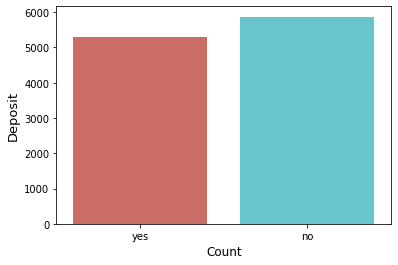

total number of no :  5873
total number of yes :  5289


In [7]:
### dataset is biased more towards no .. 


sns.countplot(x = 'deposit', data=bank_df, palette='hls')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Deposit', fontsize=13)
plt.show()
print("total number of no : ", len(bank_df[bank_df['deposit']=='no']))
print("total number of yes : ", len(bank_df[bank_df['deposit']=='yes']))

Text(0, 0.5, 'Poutcome')

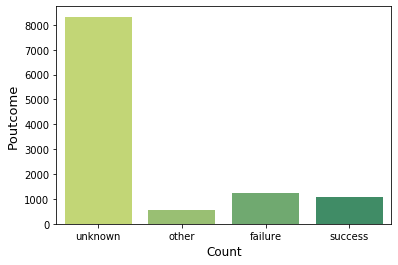

In [8]:
sns.countplot(x='poutcome', data=bank_df, palette='summer_r')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Poutcome', fontsize=13)

#### Plot Histograms for Some Selected Features for the Two Classes

Selected features should be numeric for histograms to make sense, so here are 2 features <br>
Age & Balance

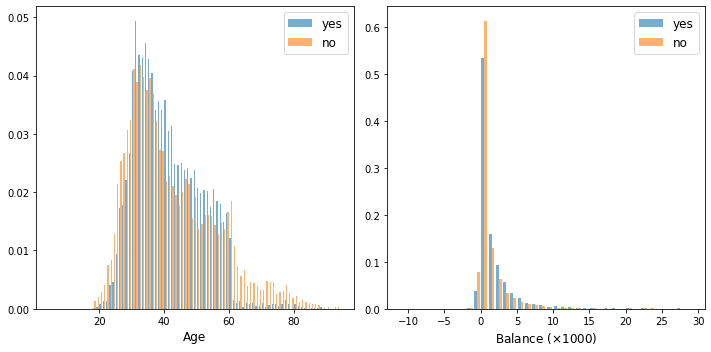

In [21]:
depo = ['yes', 'no']
sel_list = ['age', 'balance']

yes_depo = bank_df[bank_df['deposit']=='yes']
no_depo = bank_df[bank_df['deposit']=='no']

h_age_yes = list(yes_depo['age'])
h_age_no = list(no_depo['age'])

h_bal_yes = list(yes_depo['balance']/1000)
h_bal_no = list(no_depo['balance']/1000)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.hist([h_age_no, h_age_yes], density=True, label=depo, alpha=0.6, bins=range(5, 95), linewidth=1.3)
plt.xlabel('Age', fontsize=12)
plt.legend(fontsize=12)

plt.subplot(1, 2, 2)
plt.hist([h_bal_yes, h_bal_no], density=True, label=depo, alpha=0.6,bins=range(-11, 30), linewidth=1.3)
plt.xlabel(r'Balance $\left(\times 1000\right)$', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Plot Some Categorical Data  

Use [Seaborn Categorical Plot](https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot) which creates figure-level interface for drawing categorical plots onto a FacetGrid.  

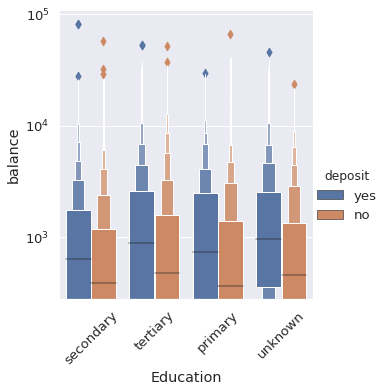

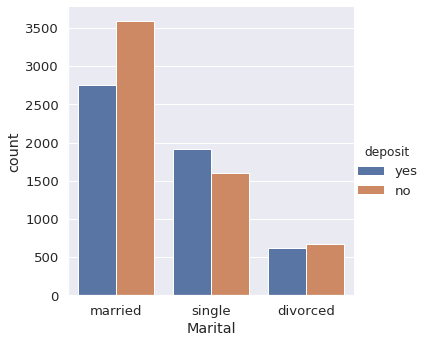

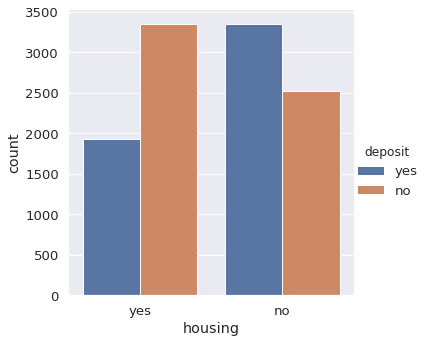

In [10]:
# plt.figure(figsize=(10, 5))
sns.set(font_scale=1.2)

g1 = sns.catplot(x='education', y='balance', hue='deposit', data=bank_df, kind='boxen')
plt.yscale('log')
plt.xlabel('Education')
g1.set_xticklabels(rotation=45)
g2 = sns.catplot(x='marital', hue='deposit', data=bank_df, kind='count')
plt.xlabel('Marital')
g3 = sns.catplot(x='housing', kind='count', hue='deposit', data=bank_df)


<Figure size 1080x504 with 0 Axes>

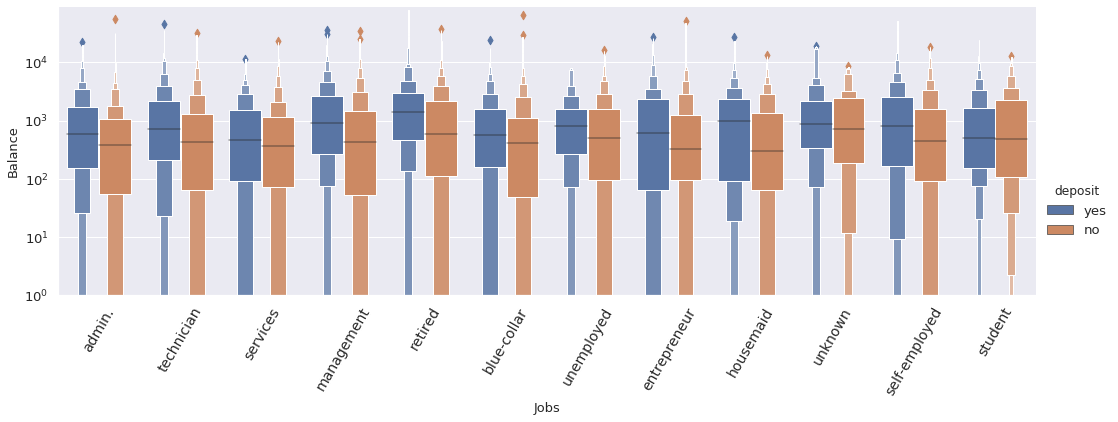

In [11]:
plt.figure(figsize=(15, 7))
# sns.set(font_scale=1.2)
g4 = sns.catplot(x='job', y='balance', hue='deposit', kind='boxen', data=bank_df, 
                height=5, aspect=3)
g4.set_xticklabels(rotation=60, fontsize=14)

plt.xlabel('Jobs', fontsize=13)
plt.ylabel('Balance', fontsize=13)
plt.yscale('log')
plt.ylim(1, 9e4)
plt.show()

#### Converting Categorical Variables to Dummy Variables 

Since the dataframe contains many categorical variables, need to convert them to dummy variabels before we can use them for classification task. Also, as mentioned in the data description 'duration' feature highly affects the target. _This feature should be included for benchmark purposes and should be discarded if the intention is to have realistic predictive model._ <br> 

Also, I have no clue what the hell actually _'poutcome'_ feature represents, so for the sake of simplicity, we will drop it too. From the countplot, most of the data falls under the 'unknown' category, so possibly reasonable to drop this variable.    

We plot the correlation matrix of numeric variables which shows very less correlation between the variables.  

So first we drop the column and then use [_pandas.get_dummies_](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. 

In [3]:
bank_df = bank_df.drop(['duration', 'poutcome'], axis=1)
print ("now column names after dropping duration: ", list(bank_df.columns))

now column names after dropping duration:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous', 'deposit']


In [4]:
print ("data types of the features: \n", bank_df.dtypes) # Find the categorical variables 

data types of the features: 
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object


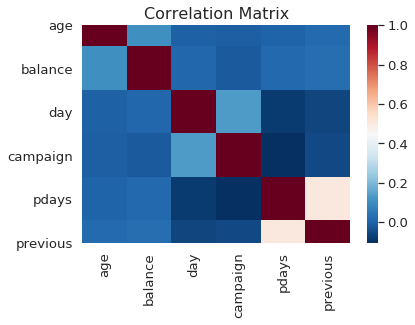

In [10]:
#### Check the Correlation Matrix of the Numerical Variables 

numeric_bank_df = bank_df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_bank_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16,)
plt.show() # very low correlation among the numeric variables, i.e. they all play important results

In [5]:
#### Finally convert the categorical variabels ('object type') to dummy variables
# Not so sure what exactly the 'poutcome' does. 

cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']


bank_df_dummies = pd.get_dummies(bank_df, columns=cat_vars)

print ("check the column names: ", bank_df_dummies.columns.tolist())
print ("\n")
print ("total number of columns: ", len(bank_df_dummies.columns.tolist()))


check the column names:  ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


total number of columns:  47


In [12]:
# Since Deposit is the label so we can now prepare the training and test data for further analysis

## Turn yes/no in deposit to 1/0 

print (bank_df_dummies['deposit'].value_counts())


no     5873
yes    5289
Name: deposit, dtype: int64


In [6]:
bank_df_dummies['deposit'] = bank_df_dummies['deposit'].map({'yes':1, 'no': 0})

print (bank_df_dummies['deposit'].value_counts())

0    5873
1    5289
Name: deposit, dtype: int64


In [7]:
labels = bank_df_dummies[['deposit']]
print ("check labels: ", labels.head(3))


check labels:     deposit
0        1
1        1
2        1


In [8]:
features = bank_df_dummies.drop(['deposit'], axis=1)


In [9]:
print ("features data type: ", features.dtypes)

features data type:  age                    int64
balance                int64
day                    int64
campaign               int64
pdays                  int64
previous               int64
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_divorced       uint8
marital_married        uint8
marital_single         uint8
education_primary      uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_no             uint8
default_yes            uint8
housing_no             uint8
housing_yes            uint8
loan_no                uint8
loan_yes               uint8
contact_cellular       uint8
contact_telephone      uint8
contact_unknown       

In [10]:
col_names_list = list(features.columns.values)
print ("features in a list: ", col_names_list)
print ("\n")
print ("number of features: ", len(col_names_list))

features in a list:  ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


number of features:  46


#### Separate Train and Test Data 

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, stratify=labels)

print ("number of training samples: ", len(X_train))
print ("number of test samples: ", len(y_test))

number of training samples:  8929
number of test samples:  2233


In [ ]:
#### 

#### Preparing the Decision Tree Classifier  _(Find the Criterion and Max Depth Using Grid Search CV)_

In [12]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


In [33]:
pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini', 'entropy'], 
               'decsT__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decsT',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)


In [16]:
### I love you so much

from tqdm import tqdm_notebook as tqdm

In [35]:
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm(range(3, 6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train, y_train)
    print("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test, y_test)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)

print ("out o' the loop")   

start fitting the data


score for 3 fold CV := 0.70
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 8}
score for 4 fold CV := 0.70
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 9}
score for 5 fold CV := 0.69
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'gini', 'decsT__max_depth': 10}

out o' the loop


#### Visualize the Tree 

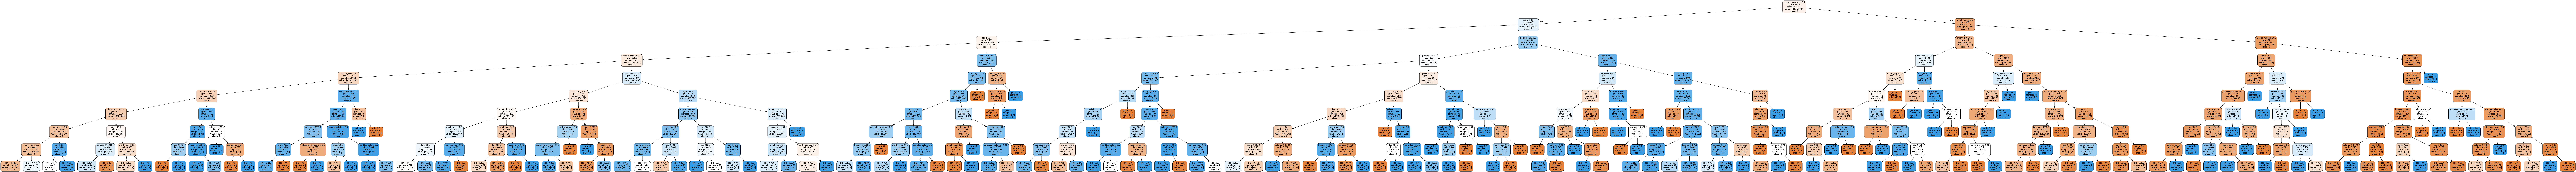

In [23]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=9)
DecsTree.fit(X_train, y_train)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names_list, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_DecsT.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())

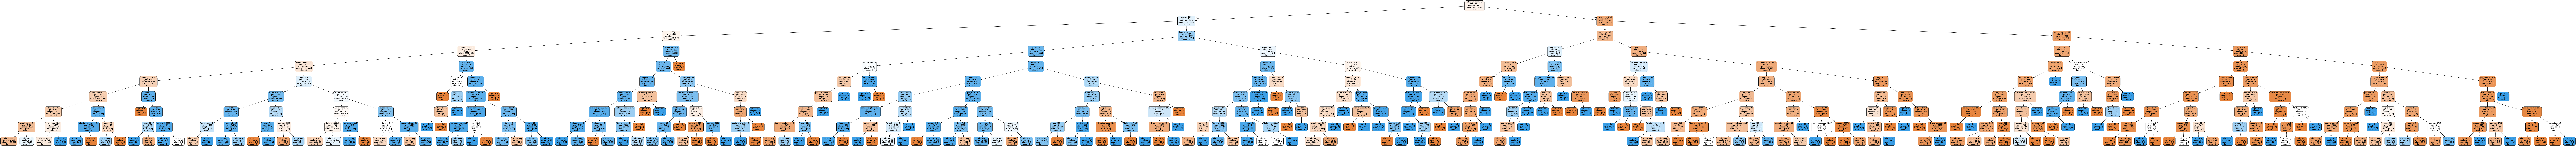

In [57]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


DecsTreeCheck = DecisionTreeClassifier(criterion='gini', max_depth=4)
DecsTree.fit(X_train, y_train)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names_list, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_DecsT_check.png',)
Image(graph.create_png())

#### Drop the Month Column and Try Again (Just for the Sake of the Decision Tree Visualization)

!!!! The Kernel should be restarted !!!!

In [3]:
bank_df_new = bank_df.drop(['duration', 'poutcome', 'month'], axis=1)
print ("now column names after dropping duration: ", list(bank_df_new.columns))

now column names after dropping duration:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'campaign', 'pdays', 'previous', 'deposit']


In [4]:
print ("data types of the features: \n", bank_df_new.dtypes) # Find the categorical variables 

data types of the features: 
 age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
campaign      int64
pdays         int64
previous      int64
deposit      object
dtype: object


In [5]:
cat_vars_new = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']


bank_df_new_dummies = pd.get_dummies(bank_df_new, columns=cat_vars_new)
print ("check the column names: ", bank_df_new_dummies.columns.tolist())
print ("total number of columns: ", len(bank_df_new_dummies.columns.tolist()))


check the column names:  ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'deposit', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown']
total number of columns:  35


In [6]:
bank_df_new_dummies['deposit'] = bank_df_new_dummies['deposit'].map({'yes':1, 'no': 0})

print (bank_df_new_dummies['deposit'].value_counts())

0    5873
1    5289
Name: deposit, dtype: int64


In [7]:
labels_new = bank_df_new_dummies[['deposit']]
print ("check labels: ", labels_new.head(3))


check labels:     deposit
0        1
1        1
2        1


In [8]:
features_new = bank_df_new_dummies.drop(['deposit'], axis=1)


In [9]:
col_names_list_new = list(features_new.columns.values)
print ("features in a list: ", col_names_list_new)

features in a list:  ['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown']


In [22]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features_new, labels_new, 
                                                                    test_size=0.25, stratify=labels_new)

print ("number of training samples: ", len(X_train_new))
print ("number of test samples: ", len(y_test_new))

number of training samples:  8371
number of test samples:  2791


In [23]:
pipe_steps = [('scaler', StandardScaler()), ('decsT', DecisionTreeClassifier())]

check_params = {'decsT__criterion':['gini', 'entropy'], 
               'decsT__max_depth': np.arange(3, 15)}

pipeline = Pipeline(pipe_steps)
print(pipeline)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('decsT',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)


In [24]:
print ("start fitting the data")
import warnings
warnings.filterwarnings("ignore")


for cv in tqdm(range(3, 6)):
    create_grid = GridSearchCV(pipeline, param_grid=check_params, cv=cv)
    create_grid.fit(X_train_new, y_train_new)
    print("score for %d fold CV := %3.2f" %(cv, create_grid.score(X_test_new, y_test_new)))
    print ("!!!! best fit parameters from GridSearchCV !!!!")
    print (create_grid.best_params_)

print ("out o' the loop")    

start fitting the data


score for 3 fold CV := 0.66
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 8}
score for 4 fold CV := 0.66
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 8}
score for 5 fold CV := 0.66
!!!! best fit parameters from GridSearchCV !!!!
{'decsT__criterion': 'entropy', 'decsT__max_depth': 6}

out o' the loop


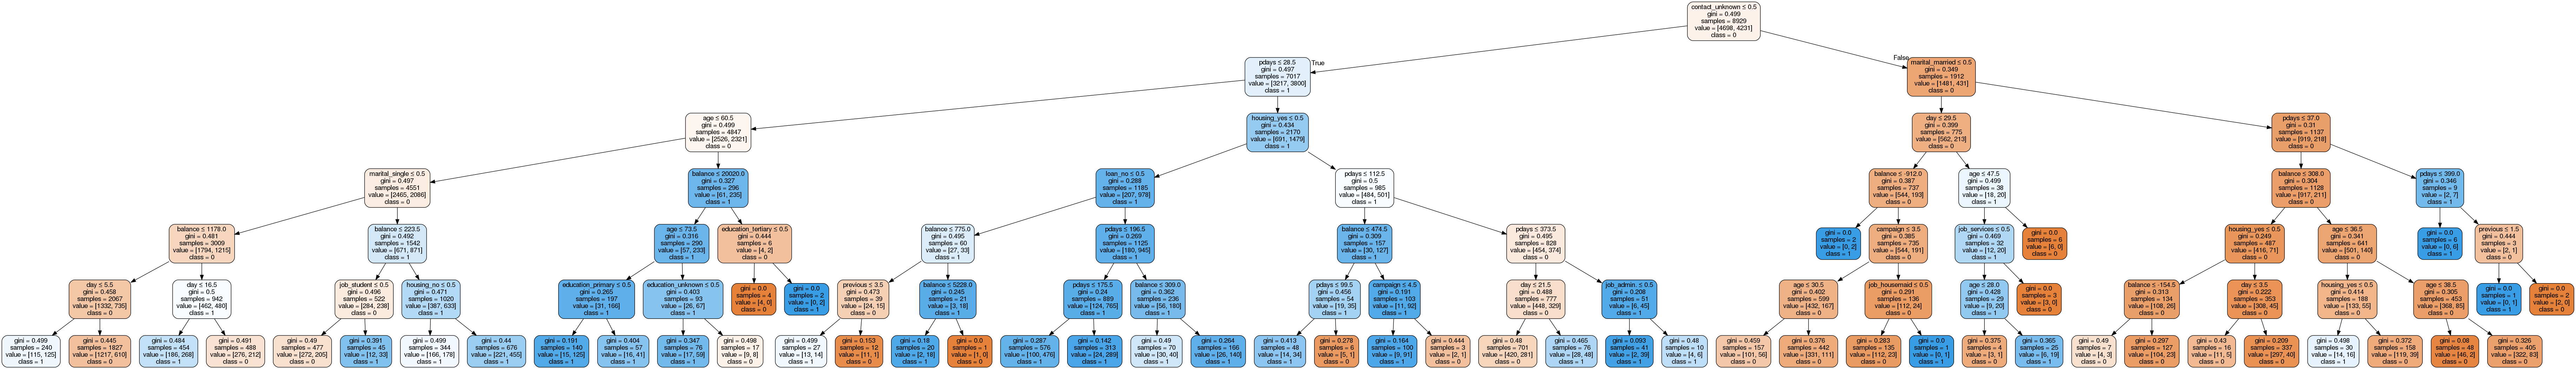

In [18]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


DecsTree = DecisionTreeClassifier(criterion='gini', max_depth=6)
DecsTree.fit(X_train_new, y_train_new)


dot_data  = StringIO()

export_graphviz(DecsTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names_list_new, class_names=['0','1'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('Bank_DecsT_new.png',)
# graph.set_size('"300, 180!"')
# graph.write_png('resized_tree.png')
Image(graph.create_png())

### Learn to Plot Feature Importance (Muller's Book)

To summarize the workings of a complicated Decision Tree, most commonly we use _feature_importance_. It is a number between 0 and 1, where 0 means the feature is not used at all to 1 implying "perfectly predicts the target".  We will also check the score on train and test data.  

In [25]:
DecsTreeModel = DecisionTreeClassifier(criterion='gini', max_depth=6)
DecsTreeModel.fit(X_train_new, y_train_new)


train_score = DecsTreeModel.score(X_train_new, y_train_new)
print ("score on the training data: ", train_score)
print ("\n")

test_score = DecsTreeModel.score(X_test_new, y_test_new)
print ("score on the test data: ", test_score)



score on the training data:  0.6977660972404731


score on the test data:  0.6603367968470082


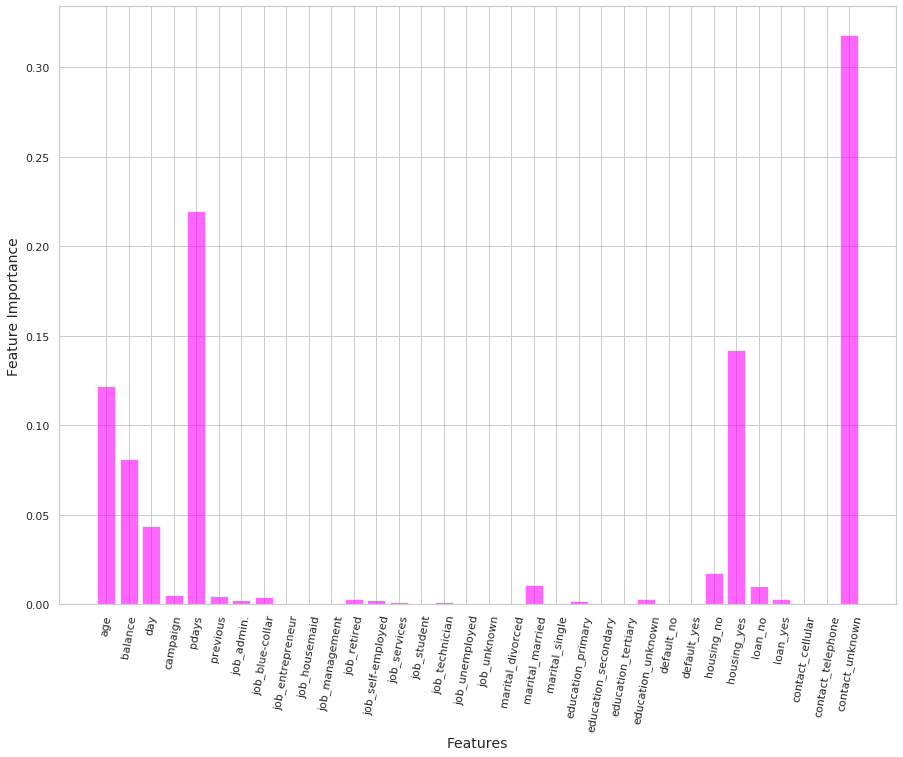

In [49]:
n_features = len(col_names_list_new)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(15, 11))
fig.tight_layout()
plt.bar(range(n_features), DecsTreeModel.feature_importances_, color="magenta", align="center", alpha=0.6)
plt.xticks(np.arange(n_features), col_names_list_new, rotation=80, fontsize=11)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Feature Importance", fontsize=14)
plt.savefig("Feature_Importance.png", dpi=300, bbox_inches='tight')# xticks are not clipped with 'bbox'